## IMPORT LIBRARY

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## MEMBACA GAMBAR

In [2]:
img = cv2.imread("AjengUts.jpg")

## KONVERT BGR KE RGB

In [3]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

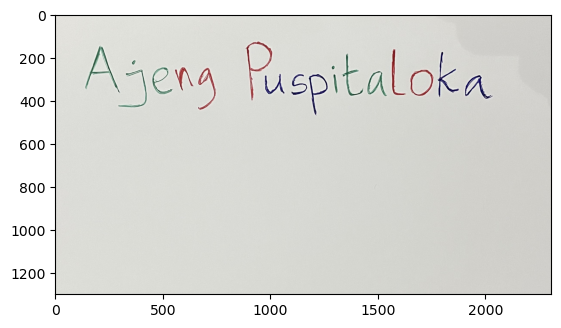

In [4]:
plt.imshow(rgb)

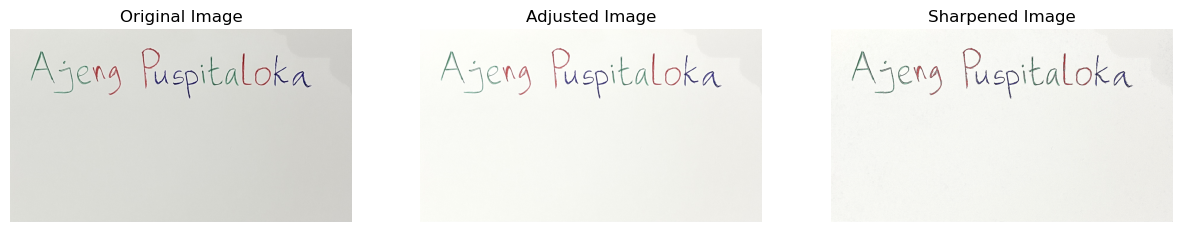

In [5]:
alpha = 1
beta = 30    
adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(adjusted, -1, kernel_sharpening)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adjusted Image')
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Sharpened Image')
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

## DETEKSI RGB

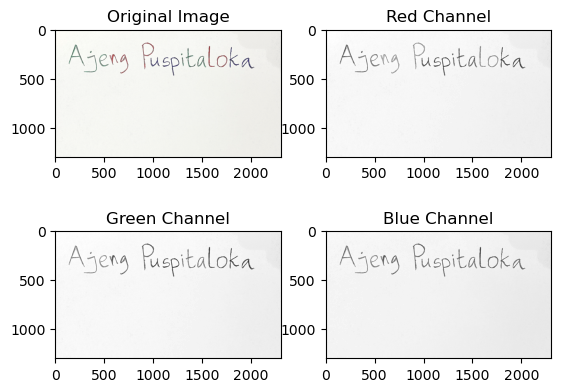

In [6]:
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)[:,:,0], cmap="gray")
plt.title('Red Channel')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)[:,:,1], cmap="gray")
plt.title('Green Channel')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)[:,:,2], cmap="gray")
plt.title('Blue Channel')

plt.show()

## HISTOGRAM

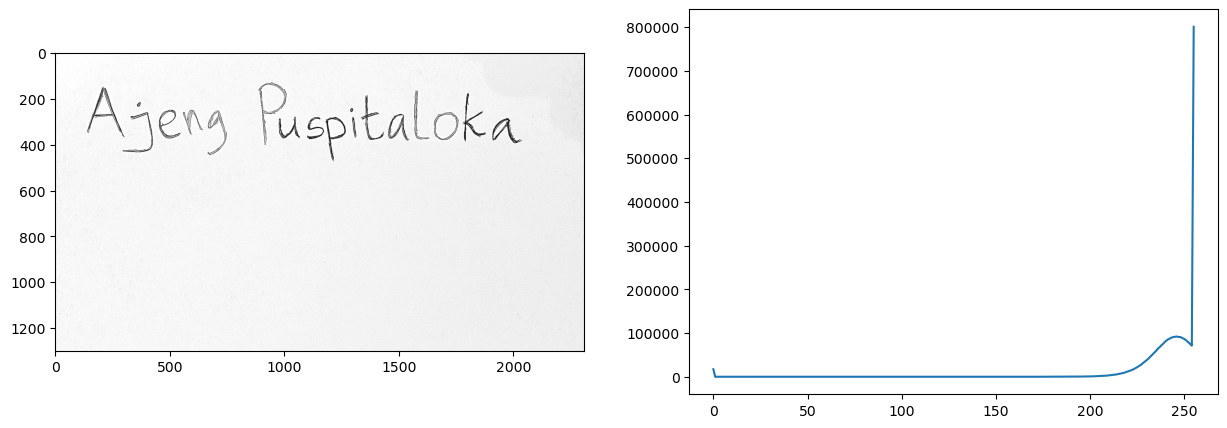

In [7]:
merah=cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)[:,:,0] #Merah
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([merah],[0],None,[256],[0,256])
axs[0].imshow(merah, cmap='gray')
axs[1].plot(hist)
plt.show()

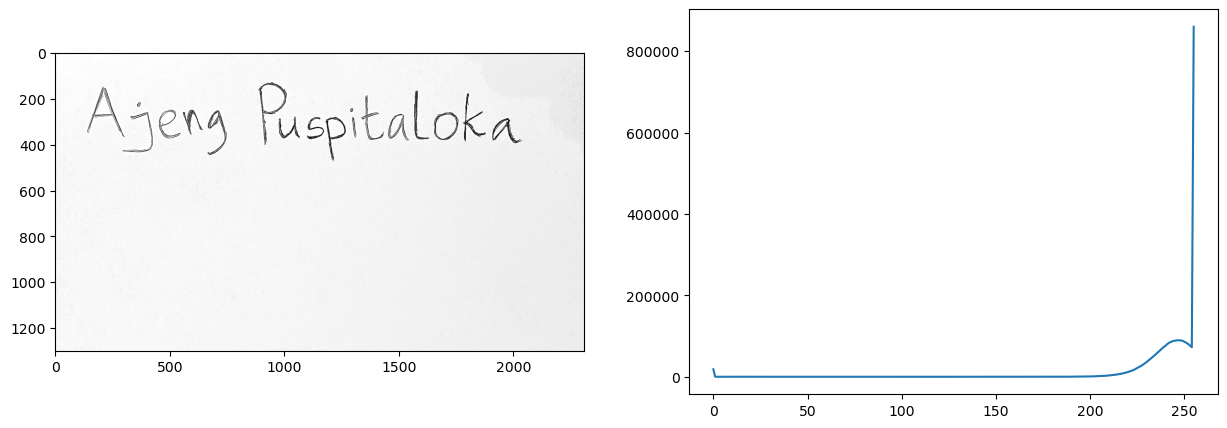

In [8]:
hijau=cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)[:,:,1] #hijau
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([hijau],[0],None,[256],[0,256])
axs[0].imshow(hijau, cmap='gray')
axs[1].plot(hist)
plt.show()

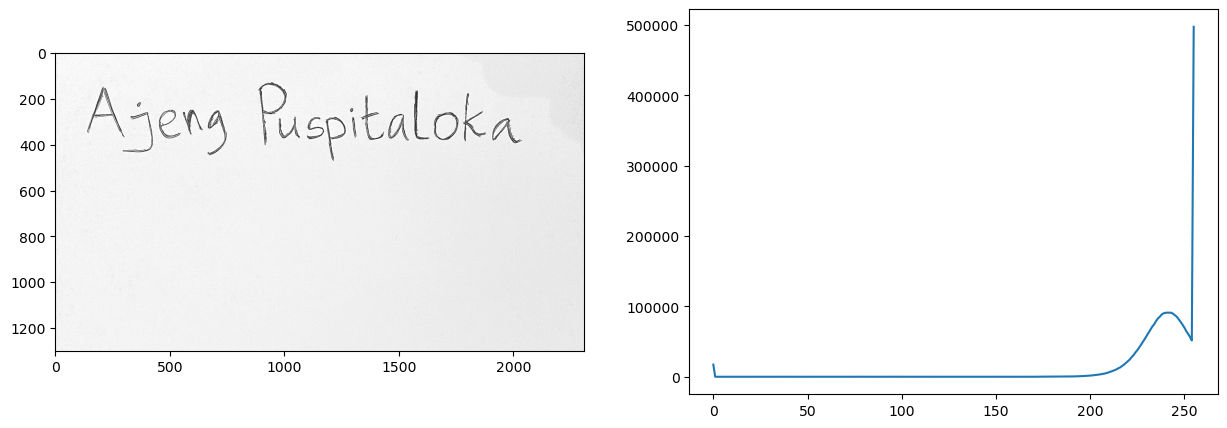

In [9]:
biru=cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)[:,:,2] #biru
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([biru],[0],None,[256],[0,256])
axs[0].imshow(biru, cmap='gray')
axs[1].plot(hist)
plt.show()

## AMBANG BATAS

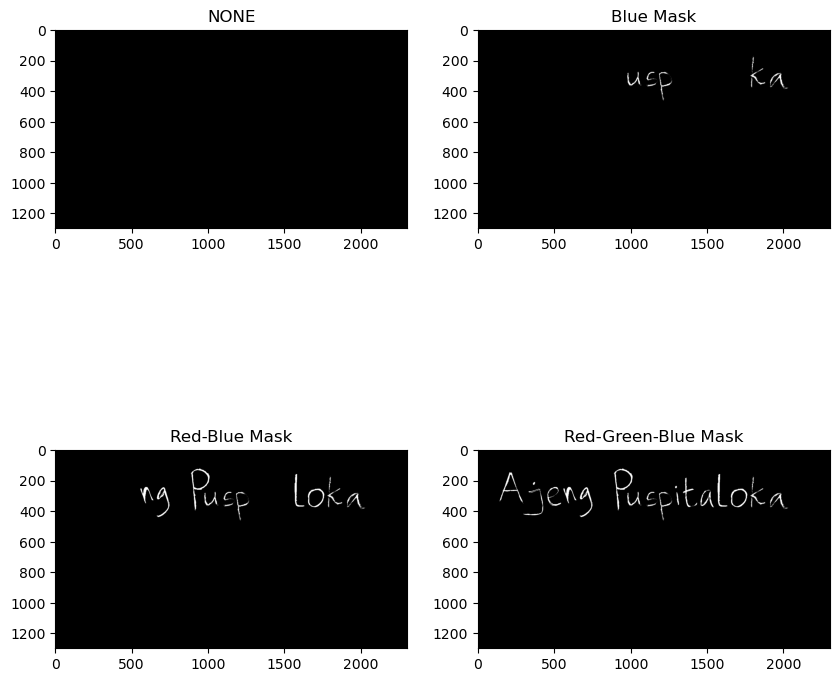

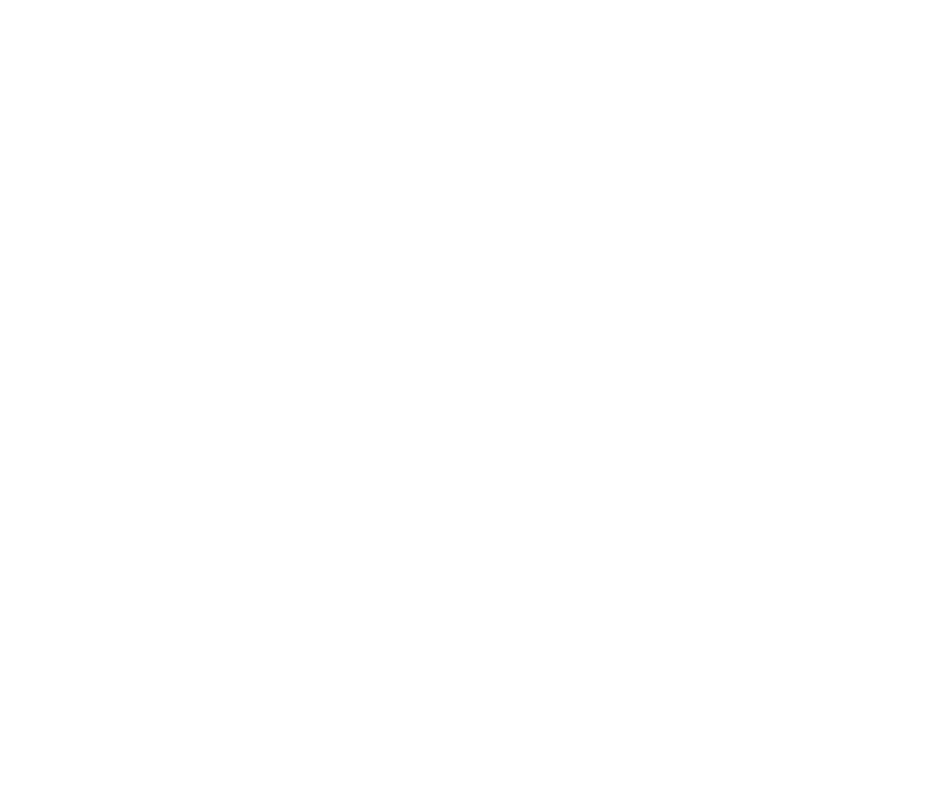

In [10]:
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(2, 2, figsize=(10,10))

red_lower1 = np.array([0, 50, 50])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 50, 50]) 
red_upper2 = np.array([180, 255, 255])

green_lower = np.array([36, 50, 50])
green_upper = np.array([86, 255, 255])

blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])

mask_red1 = cv2.inRange(image_hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(image_hsv, red_lower2, red_upper2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)  # Combine the red masks
mask_green = cv2.inRange(image_hsv, green_lower, green_upper)
mask_blue = cv2.inRange(image_hsv, blue_lower, blue_upper)

combined_mask1 = np.bitwise_or(mask_red, mask_blue)
combined_mask2 = np.bitwise_or(combined_mask1, mask_green)

(thresh, binary1) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
axs[0,1].imshow(mask_blue, cmap='gray')
axs[0,1].set_title('Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
axs[1,0].imshow(combined_mask1, cmap='gray')
axs[1,0].set_title('Red-Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
axs[1,1].imshow(combined_mask2, cmap='gray')
axs[1,1].set_title('Red-Green-Blue Mask')
plt.axis('off')

plt.show()